<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/Decision_Tree_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd

# 와인 데이터 불러와서 판다스 데이터 프레임으로 읽어 내기
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
# 데이터 둘러보기
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
# 변수별 데이터타입과 누락된 데이터 있는지 살펴보기
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
# 위에서 전부 실수형 자료임을 확인했음
# 데이터 분포를 간략히 살펴보기

wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
# 데이터를 학습하기 위해 feature(설명변수)와 target(종속변수)로 구분하기
# sklearn에 넣기 위해 numpy array로 변환

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
# 학습/테스트 데이터 셋으로 분류
# train_test_split함수 안에는 순서대로
# (feature, target, test데이터를 전체 데이터의 몇%로 할 것인지(여기서는 20%), 
#  할 때마다 다른 데이터셋으로 그룹핑 되는 것을 막기 위해 random_state로 고정)

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [11]:
# feature에는 3가지 변수가 들어가 있고, target은 하나의 값인 것을 확인
# 훈련과 테스트가 대충 80%, 20%로 나뉘어 졌는지 확인

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [12]:
# 변수들의 범위/단위가 다를 경우 성능에 영향을 줄 수 있으므로
# Standardization((x-mean)/standard deviation)
# train의 경우 fit 해준 다음 transform
# test의 경우 transform 만
# (제 생각엔) fit을 통해 mean, standard deviation을 고정하고, transform에서는 변환을 하는 것으로 추정..
# (이어서) 그래서 test를 변환할 때 test의 평균 분산으로 새로 transform 하는게 아니라 training에서 쓴 평균 분산을 쓰는 것이 아닐까.. 생각됩니다.
# 추가적인 설명 https://www.inflearn.com/questions/19038

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
# 전처리 모두 끝내서 이제 Logistic Regression 돌릴 시간
# 단순히 LogisticRegression()의 함수를 변수로 선언(우리의 경우 lr)한 뒤
# sklearn의 대부분 학습에서 그러하듯 fit()을 통해 학습

# 학습이후 성능확인(학습/테스트) 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [15]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


*위의 계수의 뜻

z = 0.51270274 * alcohol + 1.6733911 * sugar - 0.68767781 * pH + 1.81777902

y = a/(a+exp(-z))

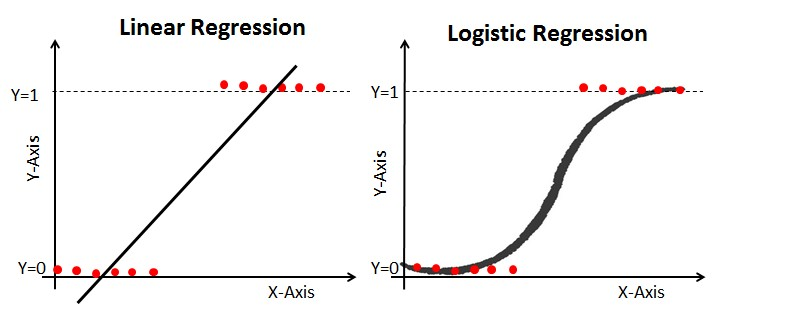

In [16]:
# 위의 로지스틱회귀가 직관적으로 이해는 잘 안됨
# 이해가 쉽도록 트리를 생성해보자
# DecisionTreeClassifier를 변수로 선언한 후 fit()만 하면 됨
# 성능이 전보다 좋아짐

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


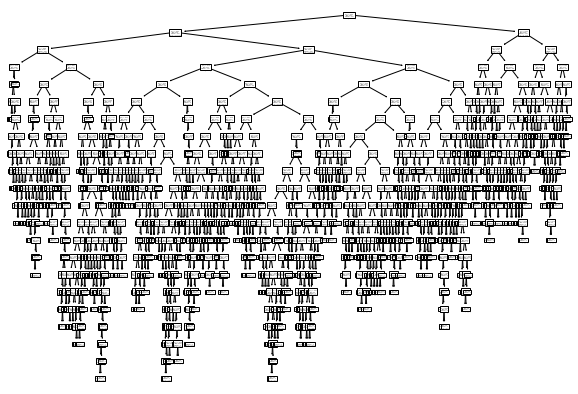

In [17]:
# 어떤 트리가 만들어졌는지 시각적으로 확인 가능

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

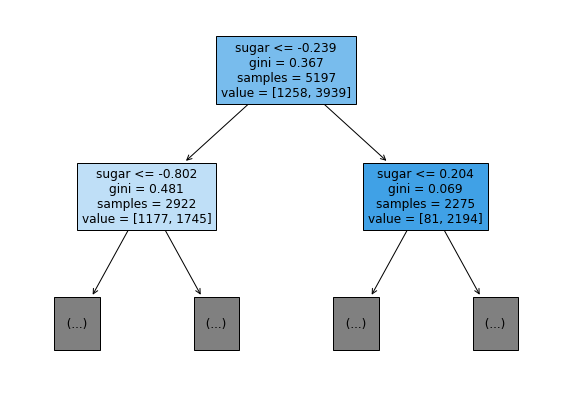

In [18]:
# 위에가 너무 안보이니 맨 위에서 가지치기 한개 한 것만 보기

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [19]:
# 학습에서 정확도가 너무 높으면 overfitting 가능성
# 적절한 가지(depth)에서 끊어주는 것이 필요
# 우리는 깊이를 3까지만 해보자

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


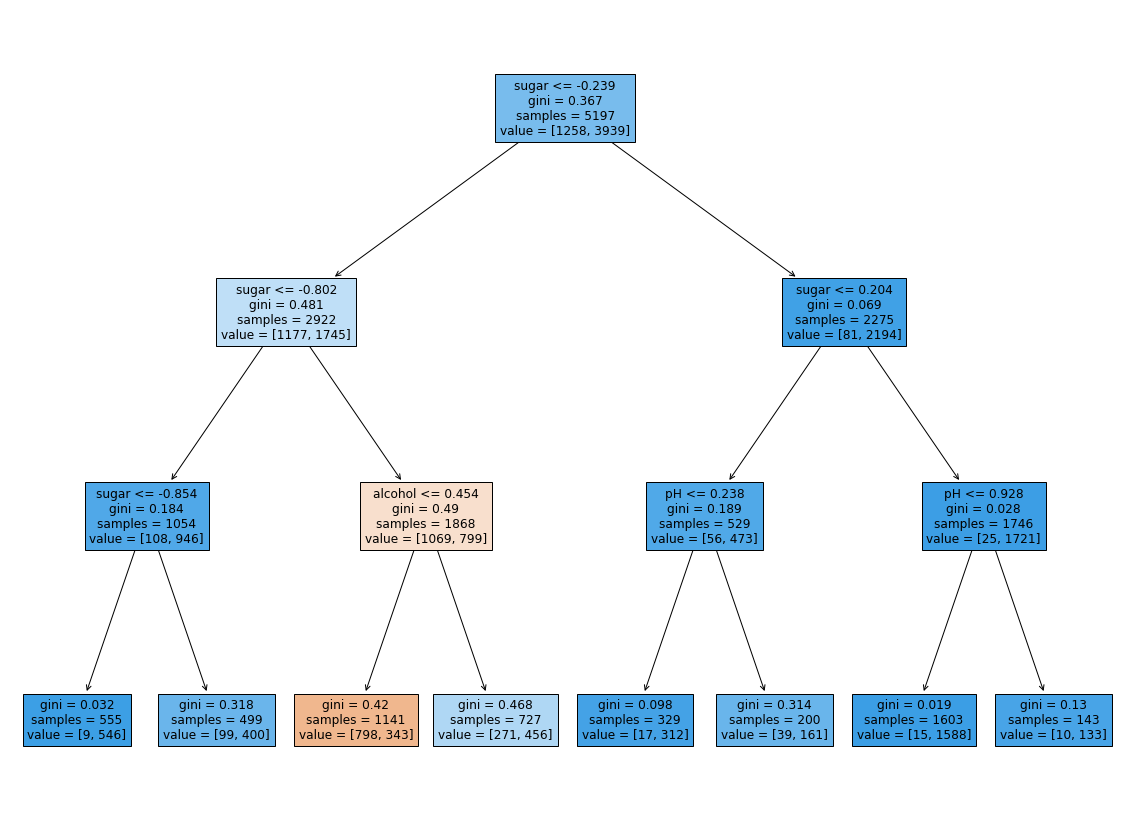

In [20]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

* 지니 불순도(Gini impurity)

지니불순도 = 1- (음성클래스 비율^2 + 양성클래스비율^2)

ex) 1-(1258/5197)^2 - (3939/5197)^2 = 0.367


* 정보이득(Information Gain)
 = 부모노드의 불순도 - 자식노드의 불순도

 (큰게 좋음. 정보이득이 최대가 되도록 데이터를 나눔)


* 지니불순도 외에 크로스엔트로피를 사용하기도 함

In [24]:
# 트리모형의 장점
# 정규화 등의 전처리가 필요없다.

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


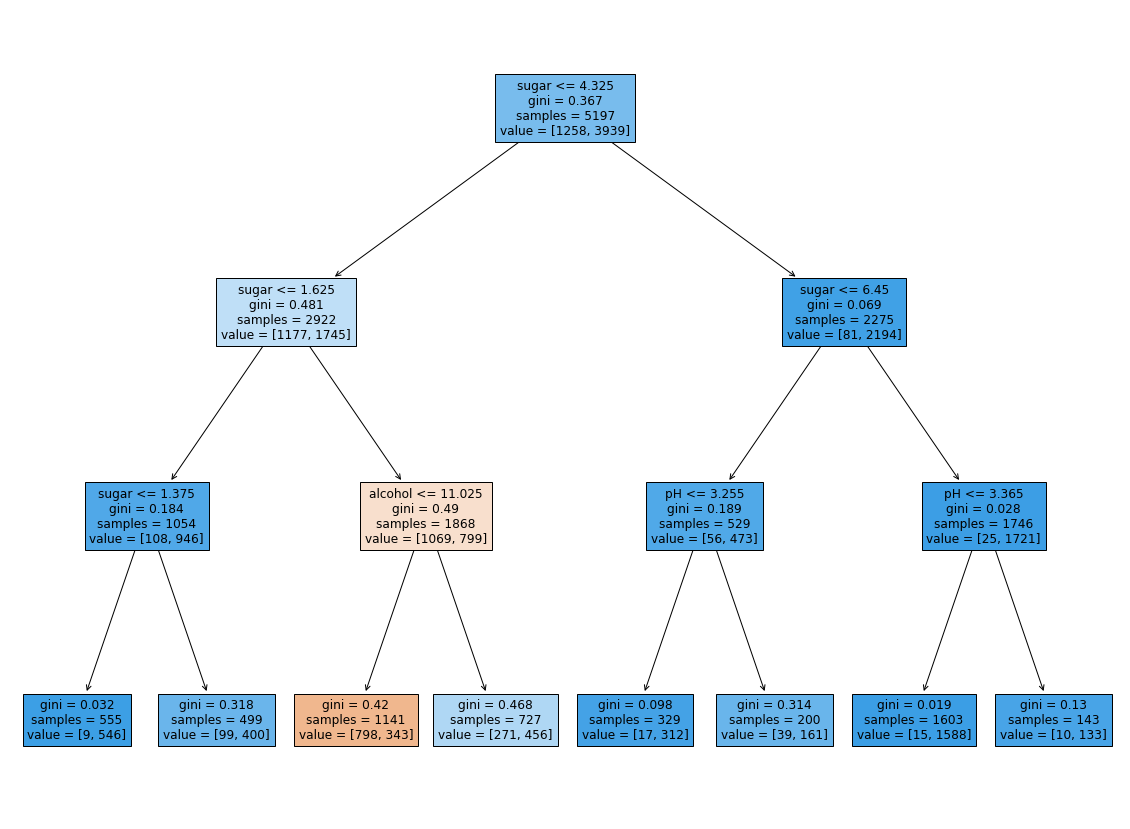

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# feature의 중요도도 파악이 가능
# 분류에서 중요한 변수는 sugar, alcohol, pH 순
# 위의 tree 그림에서 보다시피 sugar로 처음 구분됨 

print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
